<a href="https://colab.research.google.com/github/megahed1/advertising-logistic-model/blob/main/Advertising_Logistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read Data

In [22]:
#Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('advertising.csv')

In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Data PreProcessing

In [6]:
#drop unnecessary column
df.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)

In [7]:
#Check for Nulls
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Male,0
Clicked on Ad,0


In [8]:
#check for Duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
#check for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [40]:
#data after preprocessing
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


### Exploratory Data Analysis (EDA)

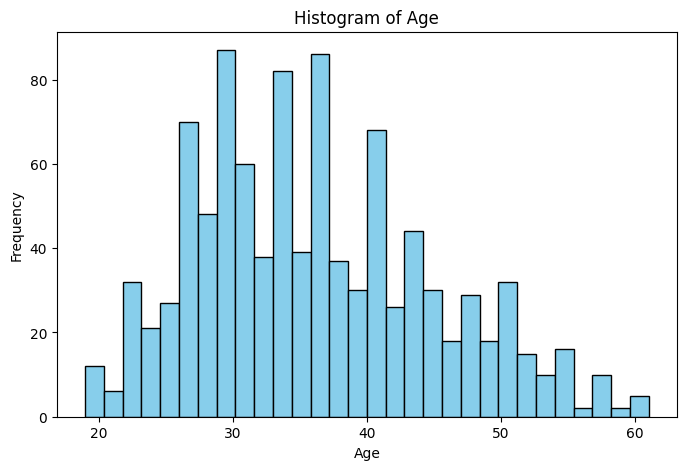

In [59]:
# Histogram Of Age
plt.figure(figsize=(8,5))
plt.hist(df["Age"], bins=30, edgecolor="black", color="skyblue")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

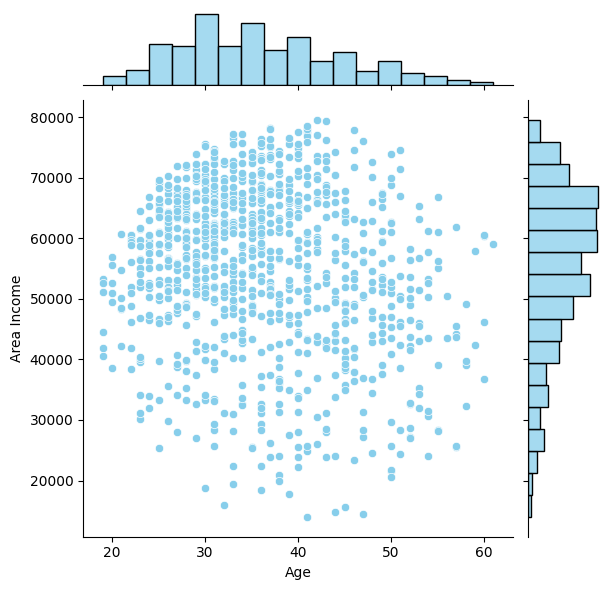

In [65]:
#Jointplot of Age vs Area Income
sns.jointplot(x="Age", y="Area Income", data=df, color = "skyblue")
plt.show()

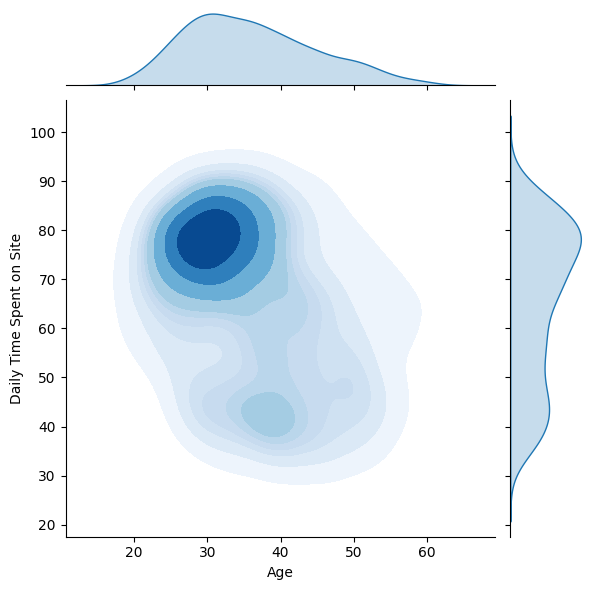

In [68]:
#KDE Jointplot of Age vs Daily Time Spent on Site
sns.jointplot(
    x="Age",
    y="Daily Time Spent on Site",
    data=df,
    kind="kde",
    fill=True,
    cmap="Blues"
)

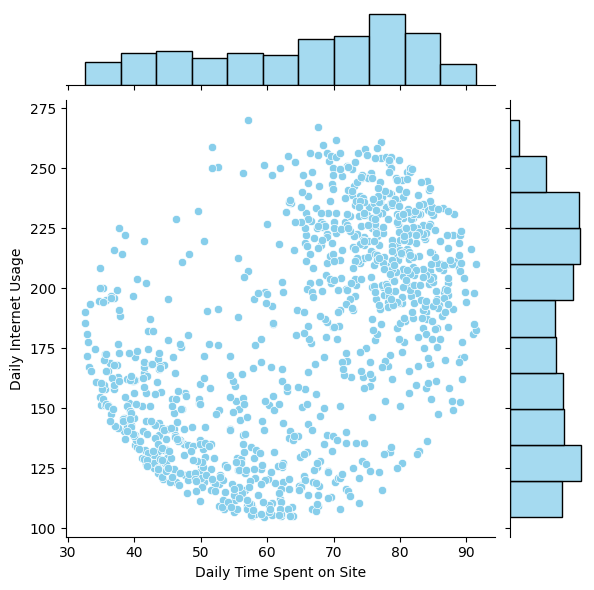

In [70]:
#Jointplot of Daily Time Spent on Site vs Daily Internet Usage
sns.jointplot(
    x="Daily Time Spent on Site",
    y="Daily Internet Usage",
    data=df,
    color = "skyblue"
)

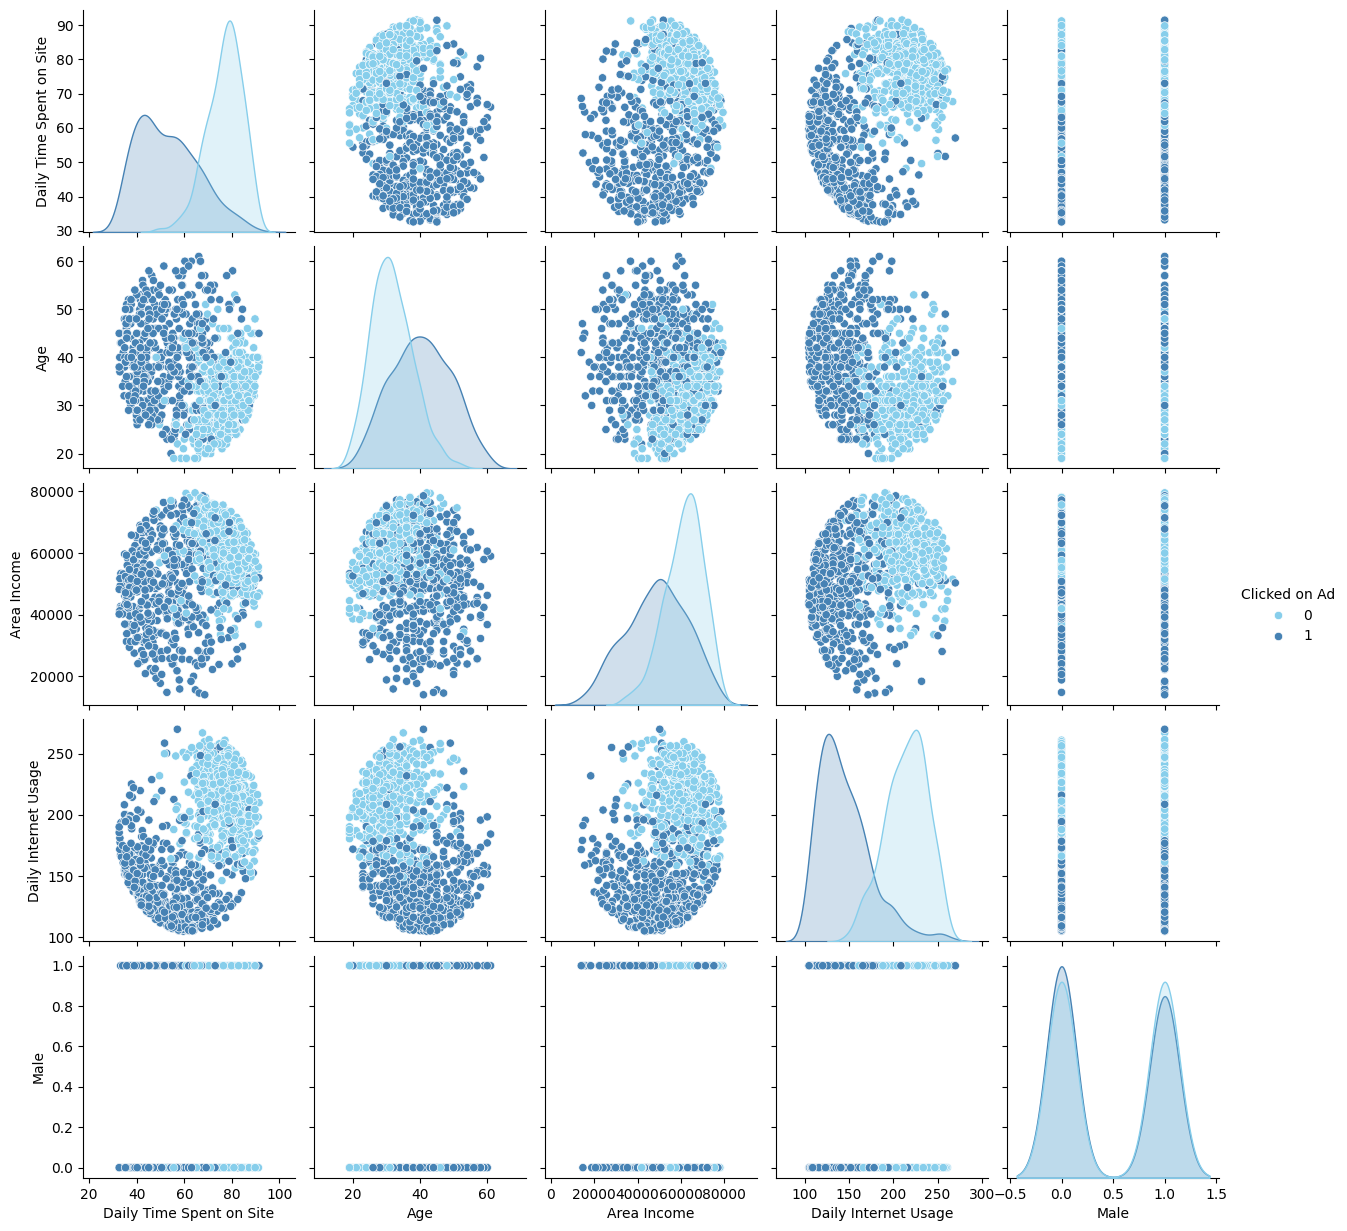

In [71]:
#Pairplot of Features Colored by Clicked on Ad
sns.pairplot(df, hue="Clicked on Ad", palette={0: "skyblue", 1: "steelblue"})

### Logistic Regression Model

In [41]:
x = df.drop('Clicked on Ad',axis=1)  #Feature
y = df['Clicked on Ad'] #label

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [43]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred = model.predict(x_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        89
           1       0.95      0.93      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 84,   5],
       [  8, 103]])

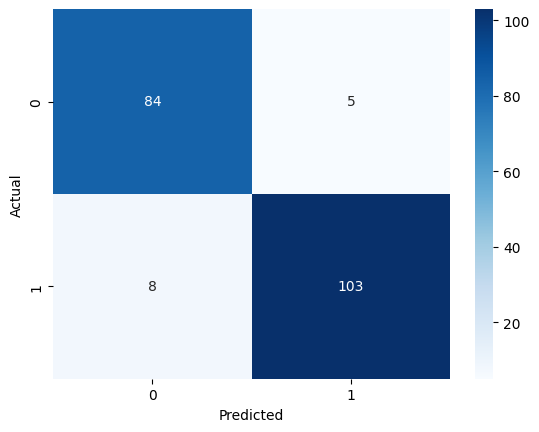

In [72]:
sns.heatmap(cm, annot= True, fmt = 'd', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

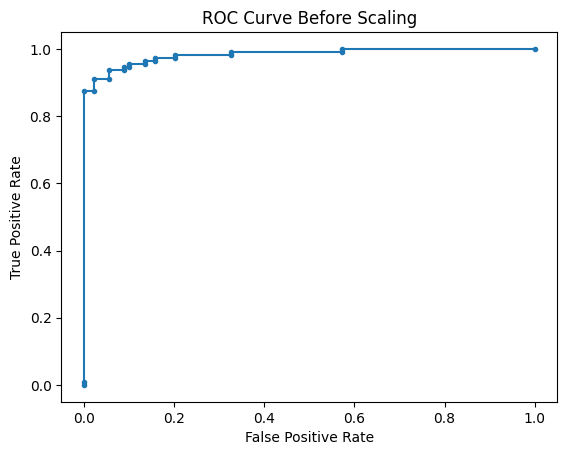

AUC Score:, 0.98


In [51]:
#ٌRoc Curve and AUC Curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
Y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Before Scaling')
plt.show()

auc_score = roc_auc_score(y_test, Y_prob)
print(f"AUC Score:, {auc_score:.2f}")

In [29]:
#Train with scaling
from sklearn.preprocessing import StandardScaler

X = df.drop('Clicked on Ad', axis=1)
Y = df['Clicked on Ad']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
Y_test_scaled = scaler.transform(X_test)

In [30]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [31]:
Y_pred = model.predict(Y_test_scaled)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        89
           1       0.95      0.93      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



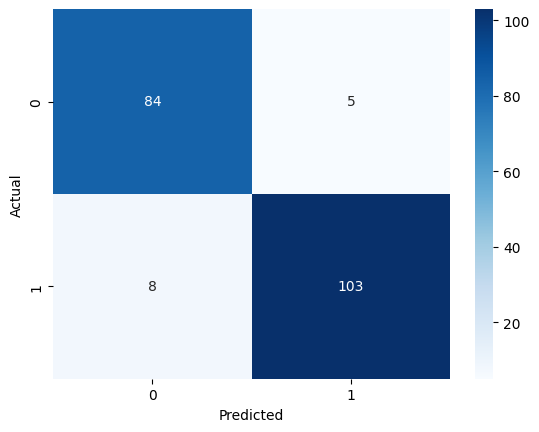

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

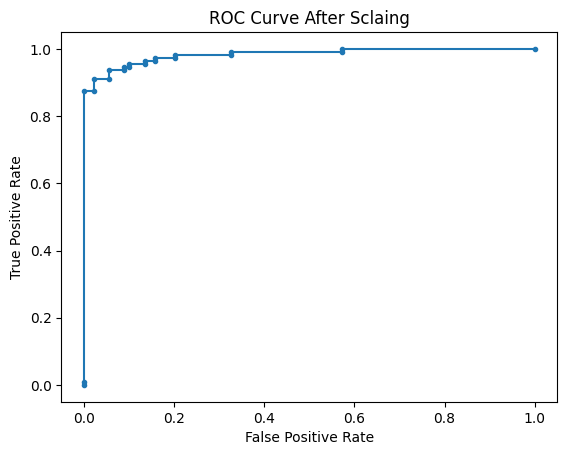

AUC Score:, 0.98


In [50]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# ROC & AUC without scaling
Y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve After Sclaing')
plt.show()

auc_score = roc_auc_score(Y_test, Y_prob)
print(f"AUC Score:, {auc_score:.2f}")

### Scaling Before and after
After applying both models (with and without feature scaling), the AUC score for both reached 0.98. This indicates that in this dataset, scaling the features did not have a significant impact on the model’s performance.